Use a modified Rickers Equation to answer the following questions about fish population.

$$X_{n+1} = \Gamma(1,0.1)X_{n}e^{r_{0}(1-\frac{X_{n}}{K})}$$

where  $\Gamma(1,0.1)$  is a noise variable with normal distribution centered at 1 and standard deviation of 0.1.

Each time step is another year

Until stated you can assume that  $𝐾=10000, 𝑟_{0}=0.3$

## Question 1


Plot various(1000+) solutions on the same figure to illustrate how the noise can vary the solutions. You can assume that your starting fish population is 100 fish

In [1]:
import numpy as np

def gamma(mu, sigma):
    return np.random.normal(mu,sigma)

def rickers(noise, xn, r0, K):
    return noise * xn * np.exp(r0 * (1-(xn / K)))

In [2]:
x0 = 100
r0 = 0.3
K = 10000
steps = 45
solutions = 5000

fish = np.zeros([steps,solutions])
x0 = np.ones(solutions) * x0
fish[0] = x0

In [3]:
for solution in range(0,solutions):
    for step in range(0,steps-1):
        
        fish[step+1][solution] = rickers(gamma(1,0.1), fish[step][solution], r0, K)

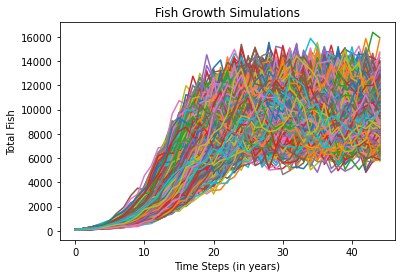

In [4]:
import matplotlib.pyplot as plt

plt.title("Fish Growth Simulations")
plt.xlabel("Time Steps (in years)")
plt.ylabel("Total Fish")
_ = plt.plot(np.arange(steps),fish[np.arange(steps)])

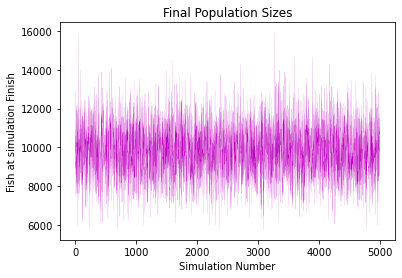

<Figure size 7200x720 with 0 Axes>

In [5]:
plt.title("Final Population Sizes")
plt.xlabel("Simulation Number")
plt.ylabel("Fish at simulation Finish")


_ = plt.plot(np.arange(solutions), fish[steps-1][np.arange(solutions)], linewidth=.1, c='m')
_ = plt.figure(figsize=(100,10))

## Question 2

After 5 years what range of fish would you expect to have if you started with

* 10 fish
* 100 fish
* 500 fish
* 1,000 fish

In [6]:
X = [10,100,500,1000]
sims = 10000
years = 5

fish = np.zeros([sims,years,len(X)])

In [7]:
for sim in range(sims):
    for x in range(len(X)):
        fish[sim][0][x] = X[x]

In [8]:
for sim in range(sims):
    for year in range(years-1):
        for x in range(len(X)):
            fish[sim][year+1][x] = rickers(gamma(1,0.1), fish[sim][year][x], r0, K)

In [9]:
maximum = np.zeros(len(X))
minimum = np.ones(len(X)) * np.inf

for sim in range(sims):
    for x in range(len(X)):
        if (fish[sim][years-1][x] > maximum[x]):
            maximum[x] = fish[sim][years-1][x]
            
        if (fish[sim][years-1][x] < minimum[x]):
            minimum[x] = fish[sim][years-1][x]

In [10]:
#range of fish

maximum - minimum

array([  47.47517764,  527.12303566, 2501.76538315, 3947.15082066])

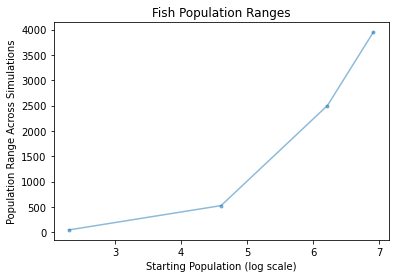

In [11]:
plt.title("Fish Population Ranges")
plt.xlabel("Starting Population (log scale)")
plt.ylabel("Population Range Across Simulations")

plt.plot(np.log(X), (maximum-minimum), '.-', alpha=0.5)

## Question 3

After 30 years, do you expect a larger distribution with higher growth rate or lower growth rate, you can assume  $𝑟_{0}\in(0,1)$. Back this up with graphs and/or data.

In [12]:
X = [10,100,500,1000]
sims = 1000
years = 30
R = np.arange(0,1,0.02)

fish = np.zeros([sims,years,len(X),len(R)])

for sim in range(sims):
    for x in range(len(X)):
        for r in range(len(R)):
            fish[sim][0][x][r] = X[x]

In [13]:
for sim in range(sims):
    for year in range(years-1):
        for x in range(len(X)):
            for r in range(len(R)):
                fish[sim][year+1][x][r] = rickers(gamma(1,0.1), fish[sim][year][x][r], R[r], K)

In [14]:
maximum = np.zeros([len(R),len(X)])
minimum = np.ones([len(R), len(X)]) * np.inf

for sim in range(sims):
    for x in range(len(X)):
        for r in range(len(R)):
            if (fish[sim][years-1][x][r] > maximum[r][x]):
                maximum[r][x] = fish[sim][years-1][x][r]

            if (fish[sim][years-1][x][r] < minimum[r][x]):
                minimum[r][x] = fish[sim][years-1][x][r]

In [15]:
averageRange = np.zeros(len(R))

for r in range(len(R)):
    averageRange[r] = np.mean((maximum[r] - minimum[r]))

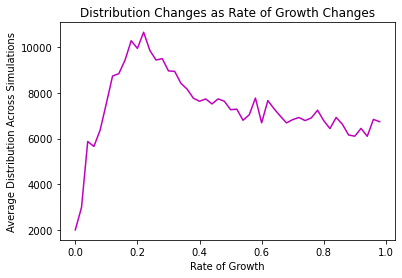

In [16]:
plt.title("Distribution Changes as Rate of Growth Changes")
plt.xlabel("Rate of Growth")
plt.ylabel("Average Distribution Across Simulations")

plt.plot(R,averageRange, c='m')

Distribution seems to hit a peak around $r_{0}$ of 0.2 and then decreases as the rate of growth increases